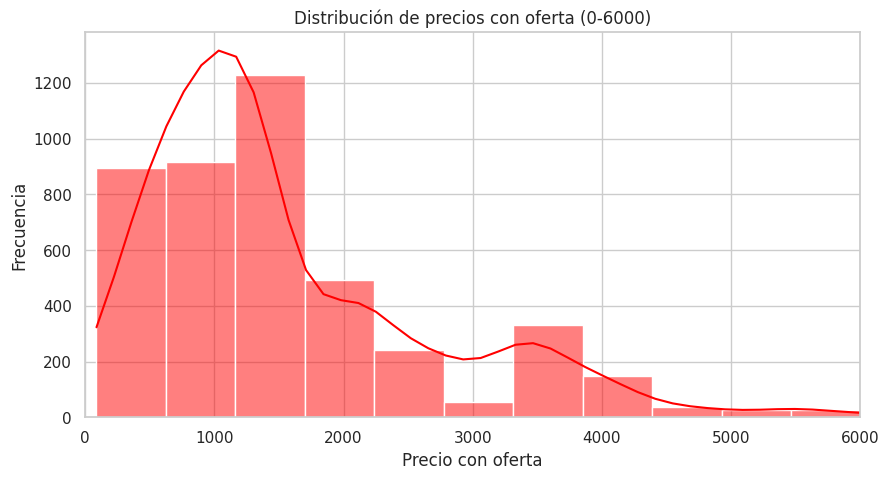

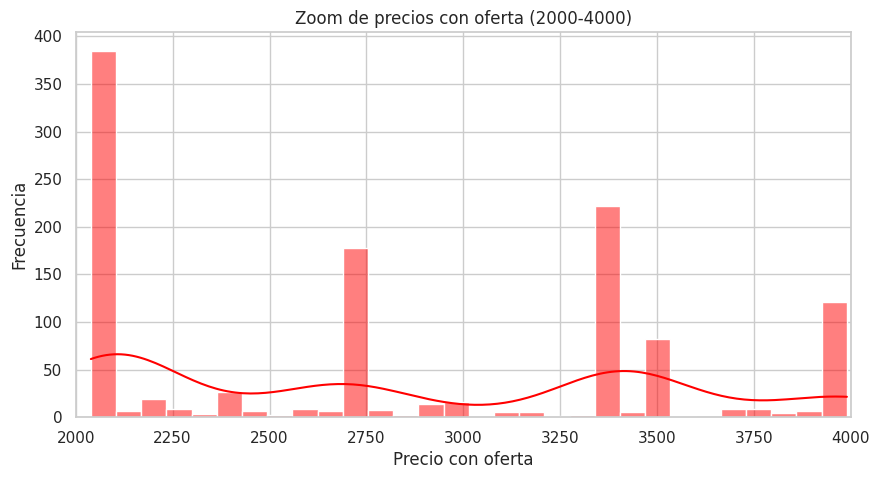

Productos más baratos:
                    title         brand  low_price
2412     Bicarbonato 30 g  Cuisine & Co       87.0
3126     Bicarbonato 30 g  Cuisine & Co       87.0
2422       Ají color 15 g  Cuisine & Co      127.0
3136       Ají color 15 g  Cuisine & Co      127.0
2421  Aliño completo 15 g  Cuisine & Co      135.0
3135  Aliño completo 15 g  Cuisine & Co      135.0
3116    Ajo en polvo 15 g  Cuisine & Co      151.0
2402    Ajo en polvo 15 g  Cuisine & Co      151.0
3158         Merquén 15 g  Cuisine & Co      191.0
2444         Merquén 15 g  Cuisine & Co      191.0


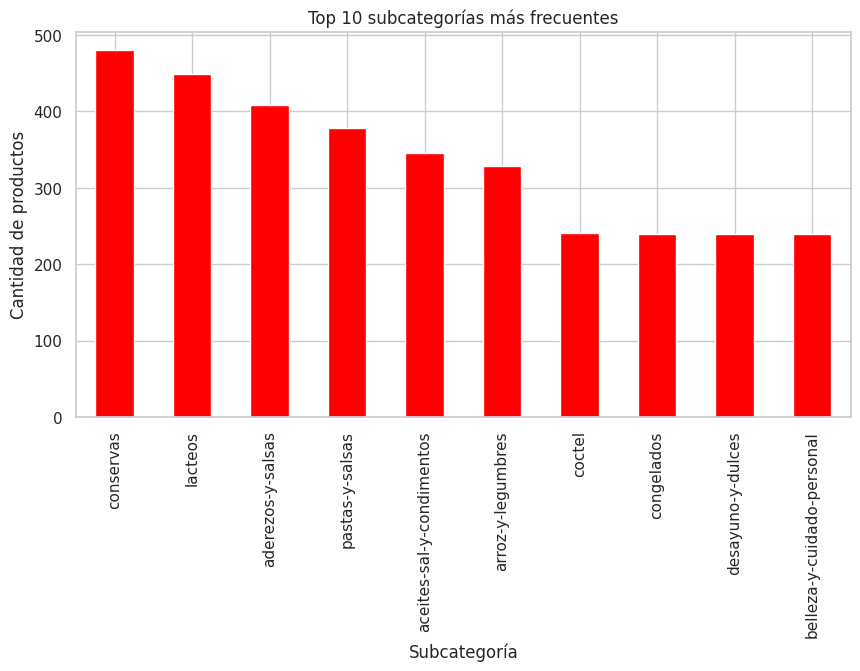

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


% de productos en oferta: 19.19%
Descuento promedio: 7.37%

Categorías con mayor descuento promedio:
categoria2
aceites-sal-y-condimentos    63.750137
instantaneos-y-sopas         38.545224
pavo                         35.545188
leches                       33.796474
lacteos                      32.569466
Name: descuento_%, dtype: float64

Evaluación del modelo de regresión:
R2 Score: 0.89
RMSE: 614.29
Ingrese el nombre del producto para recomendar: cepillo

Recomendaciones:
                                                          title    brand  \
129                             Cepillo dental plus suave 2 un.    Dento   
77                     Cepillo dental Twister Fresh suave 2 un.  Colgate   
230                        Cepillo dental doble acción 6N 2 un.  Duralón   
140                        Cepillo dental doble acción 6M 2 un.  Duralón   
47   Pasta dental Triple Acción menta original 2 un. 150 ml c/u  Colgate   

     low_price  
129     2690.0  
77      2690.0  
230     2690

In [35]:


#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

#Carga de Datos
df = pd.read_csv("santa_isabel.csv")
df.drop(["Atributos", "page"], axis=1, inplace=True)

#Limpieza y transformación
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
df[["normal_price", "low_price", "high_price"]] = df[["normal_price", "low_price", "high_price"]].replace(0, np.nan)

for col in ["normal_price", "low_price", "high_price"]:
    df[col] = df.groupby("categoria2")[col].transform(lambda x: x.fillna(x.median()))

df.fillna(df.median(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)

# Anáalisis
# Histograma
plt.figure()
sns.histplot(df["low_price"], bins=50, kde=True, color="red")
plt.xlim(0, 6000)
plt.xlabel("Precio con oferta")
plt.ylabel("Frecuencia")
plt.title("Distribución de precios con oferta (0-6000)")
plt.show()

# Histograma zoom 2000-4000
plt.figure()
sns.histplot(df[(df["low_price"] >= 2000) & (df["low_price"] <= 4000)]["low_price"], bins=30, kde=True, color="red")
plt.xlim(2000, 4000)
plt.xlabel("Precio con oferta")
plt.ylabel("Frecuencia")
plt.title("Zoom de precios con oferta (2000-4000)")
plt.show()

# Productos más baratos
productos_baratos = df.sort_values("low_price").head(10)
print("Productos más baratos:")
print(productos_baratos[["title", "brand", "low_price"]])

# Top categorías
plt.figure()
df["categoria2"].value_counts().head(10).plot(kind="bar", color="red")
plt.title("Top 10 subcategorías más frecuentes")
plt.ylabel("Cantidad de productos")
plt.xlabel("Subcategoría")
plt.show()

# KPIs
porc_oferta = df["oferta"].mean() * 100
print(f"% de productos en oferta: {porc_oferta:.2f}%")
df["descuento_%"] = ((df["normal_price"] - df["low_price"]) / df["normal_price"]) * 100
print(f"Descuento promedio: {df['descuento_%'].mean():.2f}%")
desc_cat = df.groupby("categoria2")["descuento_%"].mean().sort_values(ascending=False)
print("\nCategorías con mayor descuento promedio:")
print(desc_cat.head(5))

#Machine Learning
X = df[["normal_price", "high_price", "oferta"]]
y = df["low_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("\nEvaluación del modelo de regresión:")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {rmse:.2f}")

# 7. IA: Recomendador de productos con input del usuario
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stopwords_es = stopwords.words("spanish")

vectorizador = TfidfVectorizer(stop_words=stopwords_es)
matriz_titulos = vectorizador.fit_transform(df["title"])

def recomendar_producto(nombre_producto, n=5):
    # Buscar coincidencias ignorando mayúsculas
    coincidencias = df[df["title"].str.contains(nombre_producto, case=False, na=False)]
    if coincidencias.empty:
        print("Producto no encontrado.")
        return
    idx = coincidencias.index[0]  # Primer producto que coincide
    similitudes = cosine_similarity(matriz_titulos[idx], matriz_titulos).flatten()
    similares_idx = similitudes.argsort()[::-1][1:n+1]
    return df.iloc[similares_idx][["title", "brand", "low_price"]]

# Pedir al usuario el producto
producto_usuario = input("Ingrese el nombre del producto para recomendar: ")
print("\nRecomendaciones:")
print(recomendar_producto(producto_usuario))





